PyTorch Workflow
https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/00_pytorch_fundamentals_exercises.ipynb

https://www.learnpytorch.io/01_pytorch_workflow/


In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for nueral networks
import matplotlib.pyplot as plt


In [ ]:
what_we_are_covering= {1: "data(prepare and load)",
                       2: "build model",
                       3: "fitting the model to data (training)",
                       4: "making predictions and evaluating a model (inference)",
                       5: "saving and loading a model",
                       6: "putting it all together"}
what_we_are_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
#check PyTorch version
torch.__version__

'1.12.1+cu113'

## 1. data(prepare and load)
data can be excel, images, videos, audio, DNA, text

step 1: make data numerical
step 2: build a model to find patterns in the numbers



In [ ]:
#Create known parameters
weight = 0.7
bias = 0.3

#Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
#split data into train and test set
from sklearn.model_selection import train_test_split

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train)

(40, 40)

In [ ]:
len(X_test), len(y_test)

(10, 10)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  
  plt.figure(figsize=(10, 7))
  # Plot Training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Training Data")
  # predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s=4, label = "Predictions")
  # legend
  plt.legend(prop={"size": 14})

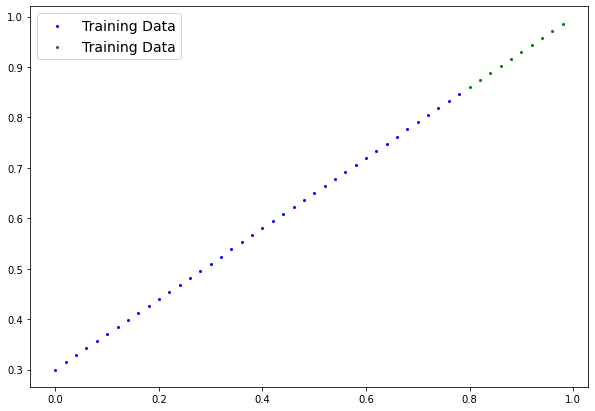

In [ ]:
plot_predictions()

## Build first pytorch model

In [ ]:
# create a linear regression PyTorch class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True, #this is also the default
                                           dtype = torch.float)) #this is also the default
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad = True, #this is also the default
                                          dtype = torch.float)) #this is also the default
  # forward method to define the computation in the mode
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### PyTorch model building Essentials
torch.nn builidng blocks for computational graphs

torch.nn.Parameter - what parameters should our model try and learn

torch.nn.module - base class for all nn modules (neural Network)

torch.optim - optimizers that help with gradient descent

def forward() - All nn.module sublasses require you to overwrite forward

In [ ]:
# from torch import LinearRegressionModel

In [ ]:
#  use .parameters() to see the parameters of the model

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### making predictions with `torch.inference_mode()`


In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

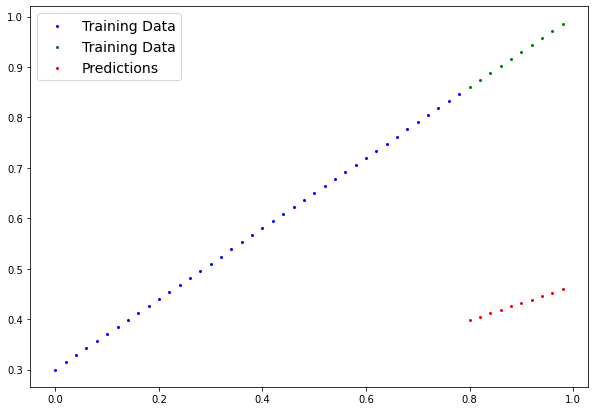

In [ ]:
plot_predictions(predictions = y_preds)

## train model
training helps
model move from the unknown to known parameters

loss function measure how wrong your function is, lower values are ideal 

optimizer takes loss function and makes adjustment to the models parameters

INTRO TO LOSS FUNCTIONS

In [ ]:
list(model_0.parameters()), 

([Parameter containing:
  tensor([0.3367], requires_grad=True), Parameter containing:
  tensor([0.1288], requires_grad=True)],)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#nn.L1Loss is Mean absolute error
loss_fn = nn.L1Loss()
# torch.optim is the optimizer - SGD is stochastic(random) gradient descent
optimizer = torch.optim.SGD(params = model_0.parameters(), 
                            lr = 0.01) #learning rate


## Build a training and a testing loop in PyTorch
loop through data ->
forward pass ->
calculate loss ->
optimizer zero grad ->
loss backward ->
optimizer step

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# epoch is a loop through data
torch.manual_seed(42)

# list for tracking progress
epoch_count = []
loss_values = []
test_loss_values = []

# epoch is set ourselves so it is a hyperparameter
epochs = 250
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() #train mode in PyTorch set all params that require gradients to actually require gradients
  # forward pass
  y_pred = model_0(X_train)
  # Calculate loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss is: {loss}")
  # optimizer zero grad
  optimizer.zero_grad()
  # perform backpropagation on the loss with respect to the params of teh model
  loss.backward()
  # step the optimizer (perform gradient descent)
  optimizer.step()

  model_0.eval() #turns off gradient tracking
  with torch.inference_mode(): #older pytorch coe may have torch.no_grad()
    # Do the forward pass
    test_pred = model_0(X_test)

    # Calculate Loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

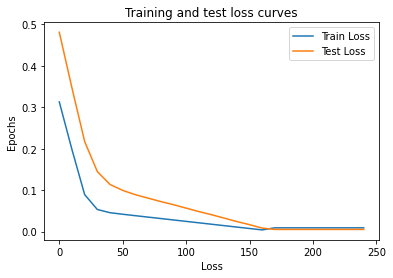

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label= "Train Loss")
plt.plot(epoch_count,test_loss_values, label= "Test Loss")
plt.title("Training and test loss curves")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend()
plt.show()

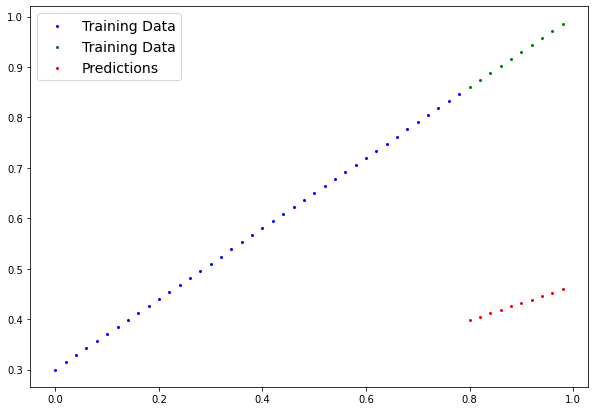

In [ ]:
plot_predictions(predictions = y_preds)

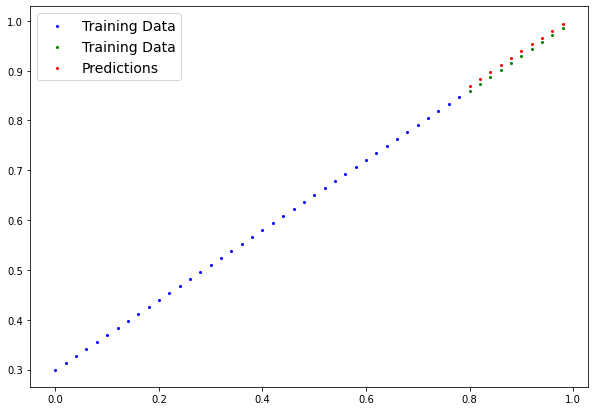

In [ ]:
plot_predictions(predictions = y_preds_new)

#`torch.save()` -> saves as python pickle format
#`torch.load()`
#`torch.nn.Module.load_state_dict()` -> load a models save state dictionary


In [ ]:
# module to create file paths
from pathlib import Path

#create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model state dict
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f = MODEL_SAVE_PATH)


Saving Model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1063 Oct 23 14:53 01_pytorch_workflow_model_0.pth


In [ ]:
#Load a model back in - will need to make a new instance of the model class
loaded_model_0 = LinearRegressionModel()
#load save state
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

##Putting it all together

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu
